In [1]:
import numpy as np
from pynq import pl
from pynq import allocate
from pynq import Overlay
import matplotlib.pyplot as plt
from pynq.overlays.xadc_scope import xadc_scopeOverlay

In [2]:
overlay = xadc_scopeOverlay('design_1.bit')

In [3]:
# overlay?
# overlay.ip_dict['axi_dma_0']
# overlay.axi_dma_0?
overlay.ip_dict.keys()

dict_keys(['pdw_0', 'custom_ip_0', 'axi_dma_0', 'dma_adc', 'xadc_wiz_0', 'processing_system7_0'])

In [10]:
dma = overlay.dma_adc
# dma = ol.axi_dma_0
# dma_send = overlay.dma_adc.sendchannel
dma_recv = overlay.dma_adc.recvchannel

In [11]:
dma.recvchannel.running

False

In [12]:
data_size=10**5
input_buffer = allocate(shape=(data_size,), dtype=np.uint32)
time_l = allocate(shape=(data_size,), dtype=np.uint32)
output_buffer=[]
for i in range(10):
    output_buffer.append(allocate(shape=(data_size,), dtype=np.uint32))
# output_buffer = allocate(shape=(data_size,), dtype=np.uint32)
# recvstatus = dma.recvchannel.running
# dma.recvchannel.transfer(input_buffer)
# # dma.recvchannel.wait_async()
# mp.plot(input_buffer[:])
for i in range(data_size):
    input_buffer[i] = 0
    time_l[i] = i

In [13]:
lim=0
for i in range(len(output_buffer)-lim):
#     while not (dma_recv.idle):
#         pass
    print(i)
    overlay = xadc_scopeOverlay('design_1.bit')
    dma_recv = overlay.dma_adc.recvchannel
    dma_recv.transfer(output_buffer[i])
#     print(dma.recvchannel.wait_async())
    print(i)
#     break
#     while not (dma_recv.idle):
#         pass

0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9


In [14]:
ci=0#len(time)//4
cf=len(time_l)//1

fig_x , fig_y = 25 , 2
clrs= 'rgbcmyk'

1


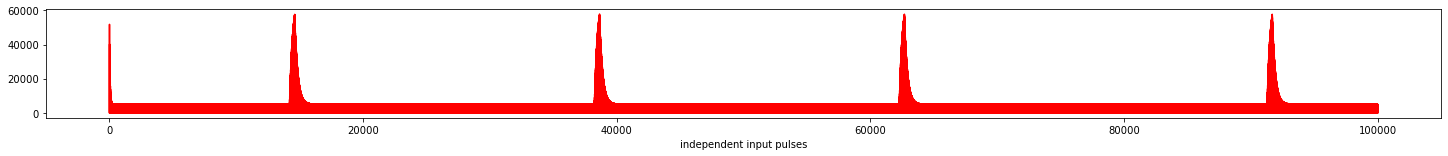

2


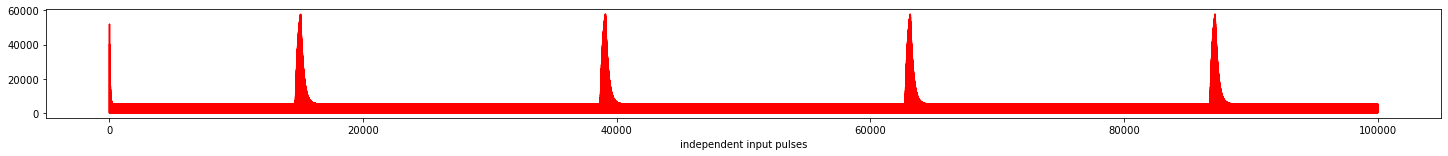

3


In [ ]:
for i in range(len(output_buffer)-lim):
    print(i+1)
    plt.figure(figsize=(fig_x , fig_y))
    plt.plot(time_l[ci:cf],list(output_buffer[i])[ci:cf], color=clrs[0])
    plt.xlabel("independent input pulses")
    # plt.ylim([0, ylim])
    # plt.savefig("independent"+str(jdx)+".jpg")
    plt.show()
#     break

In [44]:
del input_buffer